# C7M4 Notebook 1: Model Development

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
df = pd.read_csv("datasets/new_auto.csv", index_col = 0)

In [3]:
df.head()

,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,horsepower,peak_rpm,city_kmpl,highway_kmpl,price,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo,horsepower_binned
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,8.93,11.48,13495.0,False,True,True,False,low
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,8.93,11.48,16500.0,False,True,True,False,low
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,8.08,11.05,16500.0,False,True,True,False,medium
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,10.20,12.76,13950.0,False,True,True,False,low
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,7.65,9.35,17450.0,False,True,True,False,low


--------------
## Linear Regression and Multiple Linear Regression

### Linear Regression

<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
 Y: Response \ Variable\\\\\\
 X: Predictor \ Variables
$$

 <b>Linear Function</b>
$$
Yhat = a + b  X
$$
<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [4]:
# from sklearn.linear_model import LinearRegression

In [5]:
#1
# creating linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [6]:
# Fitting Linear model using "highway_kmpl"
x_highway_kmpl = df[["highway_kmpl"]]
y_highway_kmpl = df[["price"]]

In [7]:
lm.fit(x_highway_kmpl, y_highway_kmpl)

LinearRegression()

In [8]:
y_highway_kmpl_hat = lm.predict(x_highway_kmpl)
y_highway_kmpl_hat[0:5]

array([[16236.05925099],
       [16236.05925099],
       [17066.98165009],
       [13762.61583039],
       [20352.02369308]])

In [9]:
#value of intercept
lm.intercept_

array([38419.75492948])

In [10]:
#value of slope
lm.coef_

array([[-1932.37767234]])

Final estimated model would be
<b>Price</b> = 38419.75 - 1932.38 x <b>highway-mpg</b>


In [11]:
# 2

x_engine_size = df[["engine_size"]]
y_engine_size = df[["price"]]

lm.fit(x_engine_size, y_engine_size)

y_engine_size_hat = lm.predict(x_engine_size)

print(f"first five value of prediction:\n {y_engine_size_hat[0:5]}\n")
print(f"intercept value: {lm.intercept_}")
print(f"slope value: {lm.coef_}")
print(f"Final equation will be as follows:\nPrice = {lm.intercept_} + {lm.coef_} x engine_size")

first five value of prediction:
 [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]
 [14729.62322775]]

intercept value: [-7963.33890628]
slope value: [[166.86001569]]
Final equation will be as follows:
Price = [-7963.33890628] + [[166.86001569]] x engine_size


### Multiple Linear Regression

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

Equation is given by:
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb_weight</li>
    <li>Engine_size</li>
    <li>Highway_kmpl</li>
</ul>
Let's develop a model using these variables as the predictor variables.



In [12]:
x_multiple = df[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]]
y_multiple = df[["price"]]

lm.fit(x_multiple, y_multiple)

print(f"Intercept Value:  {lm.intercept_}")
print(f"Coefficients value: {lm.coef_}")

y_multiple_hat = lm.predict(x_multiple)
print(f"first five value of prediction:\n {y_multiple_hat[0:5]}\n")

Intercept Value:  [-15800.35650377]
Coefficients value: [[53.48368898  4.70690428 81.53586769 84.52096676]]
first five value of prediction:
 [[13699.48856812]
 [13699.48856812]
 [19051.13094383]
 [10620.91218091]
 [15521.71445136]]



In [13]:
x_multiple_2 = df[["normalized_losses", "highway_kmpl"]]
y_multiple_2 = df[["price"]]

lm.fit(x_multiple_2, y_multiple_2)

print(f"Intercept Value:  {lm.intercept_}")
print(f"Coefficients value: {lm.coef_}")

y_multiple_2_hat = lm.predict(x_multiple_2)
print(f"first five value of prediction:\n {y_multiple_2_hat[0:5]}\n")

Intercept Value:  [38199.51392579]
Coefficients value: [[ 1.48611386e+00 -1.92939356e+03]]
first five value of prediction:
 [[16231.38176403]
 [16231.38176403]
 [17061.02099422]
 [13824.17479112]
 [20403.40682591]]



### Model Evaluation Using Visualization

#### Regression Plot
<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


(0.0, 48188.113380720715)

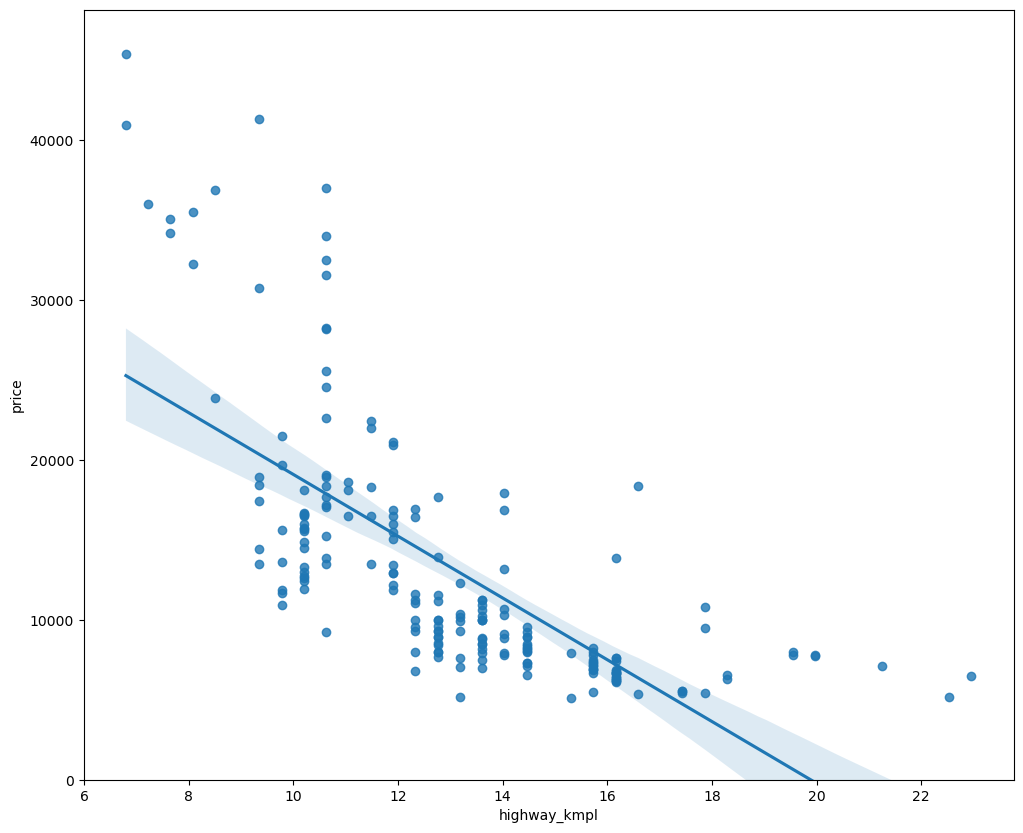

In [14]:
# highway_kmpl vs price
width = 12
height = 10

plt.figure(figsize = (width, height))
sns.regplot(x = "highway_kmpl", y = "price", data = df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway_kmpl since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak_rpm".</p>


(0.0, 47414.1)

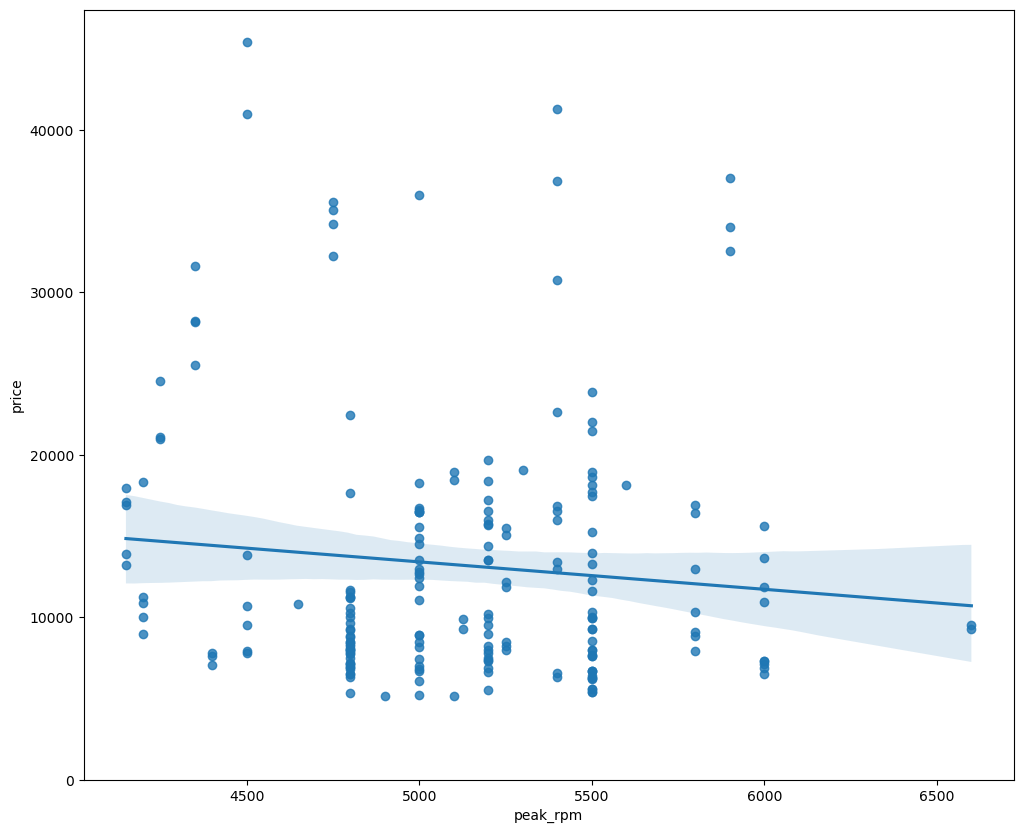

In [15]:
plt.figure(figsize = (width, height))
sns.regplot(x = "peak_rpm", y = "price", data = df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak_rpm" and "highway_kmpl", we see that the points for "highway_kmpl" are much closer to the generated line and, on average, decrease. The points for "peak_rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak_rpm" increases.</p>


In [16]:
df[["peak_rpm", "highway_kmpl", "price"]].corr()

,peak_rpm,highway_kmpl,price
peak_rpm,1.000000,-0.058622,-0.101616
highway_kmpl,-0.058622,1.000000,-0.704818
price,-0.101616,-0.704818,1.000000


<h4>Residual Plot</h4>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


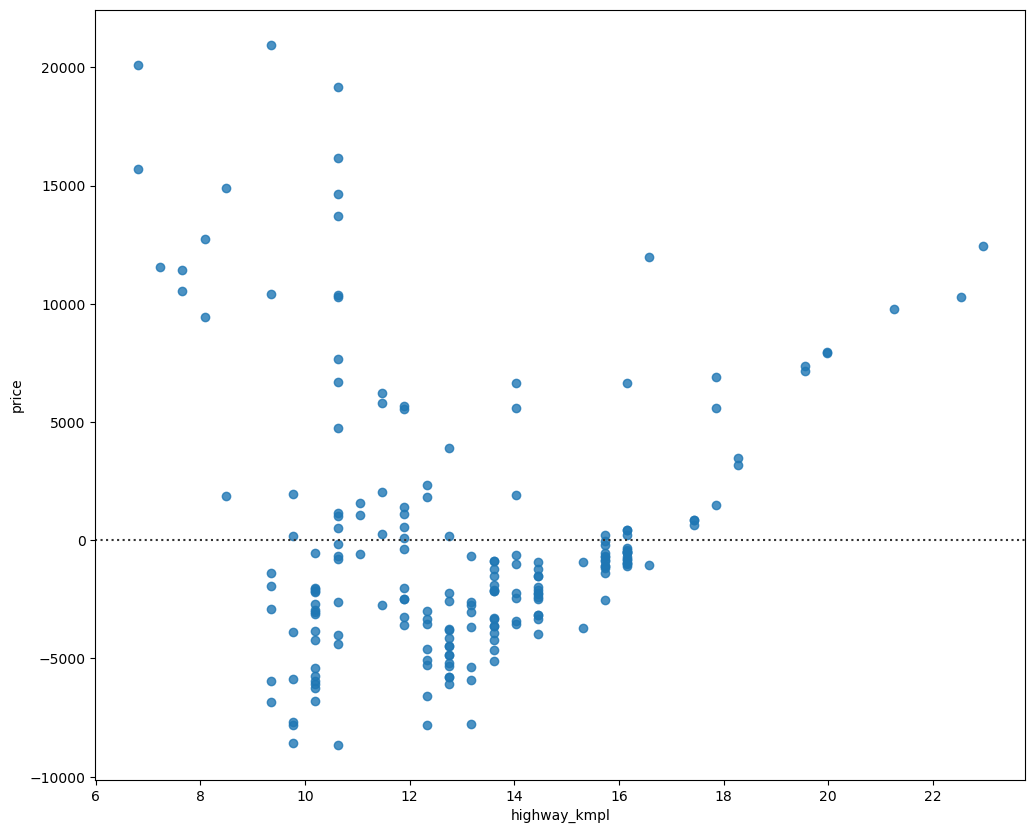

In [17]:
width = 12
height = 10

plt.figure(figsize = (width, height))
sns.residplot(x = df["highway_kmpl"], y = df["price"])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h4>Kernel Density Estimation (KDE) Plots to visualize MLR</h4>
<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>KDE plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>



In [18]:
#copied code from above MLR example

x_multiple = df[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]]
y_multiple = df[["price"]]

lm.fit(x_multiple, y_multiple)

#print(f"Intercept Value:  {lm.intercept_}")
#print(f"Coefficients value: {lm.coef_}")

y_multiple_hat = lm.predict(x_multiple)
#print(f"first five value of prediction:\n {y_multiple_hat[0:5]}\n")

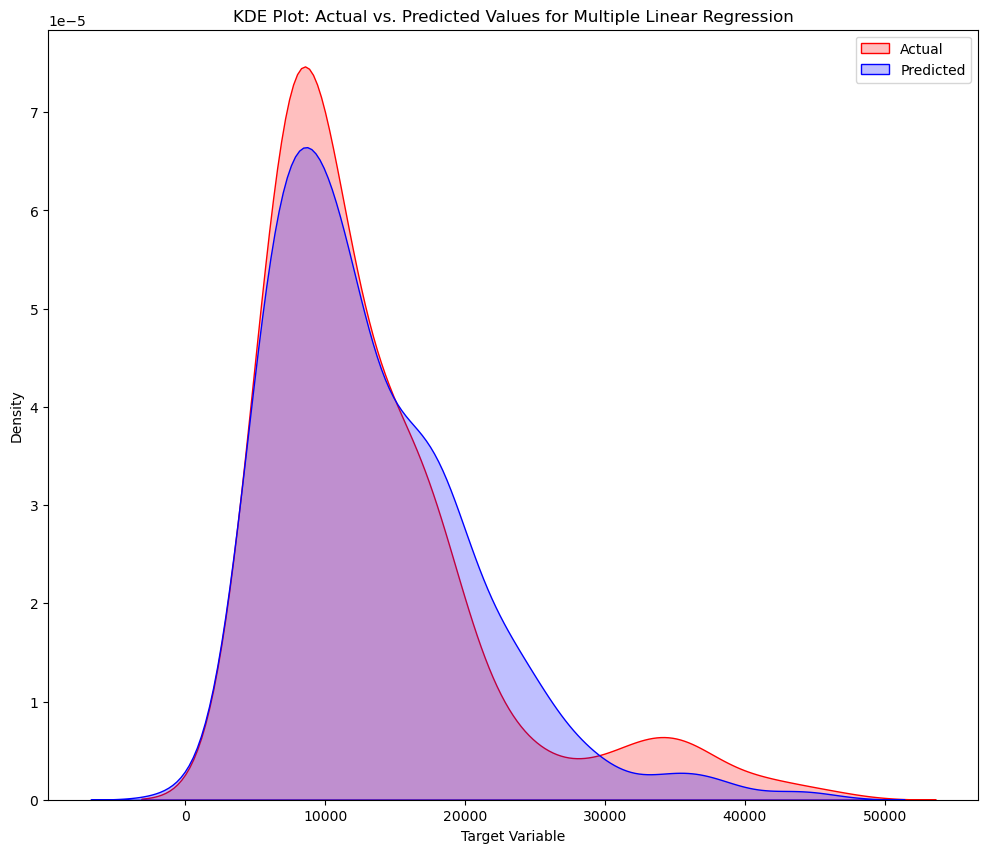

In [19]:
plt.figure(figsize = (width, height))

sns.kdeplot(y_multiple, label = "Actual", fill = True, palette = ['red'])
sns.kdeplot(y_multiple_hat, label = "Predicted", fill = True, palette = ['blue'])

plt.xlabel('Target Variable')
plt.ylabel('Density')

plt.title('KDE Plot: Actual vs. Predicted Values for Multiple Linear Regression')
plt.legend()
plt.show()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


----------------
----------------
## Polynomial Regression and Pipelines
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$
<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


In [20]:
# following function to plot data
def  plotpolly(model, independant_variable, dependant_variable, name):
    x_new = np.linspace(independant_variable.min(), independant_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independant_variable, dependant_variable, ".", x_new, y_new, "-")
    plt.title(f"polynomial Regression Fit: Price vs {name}")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel("price")

    plt.show()

#### Polynomial Regression with one variable

        3        2
-20.23 x + 1131 x - 2.106e+04 x + 1.378e+05 



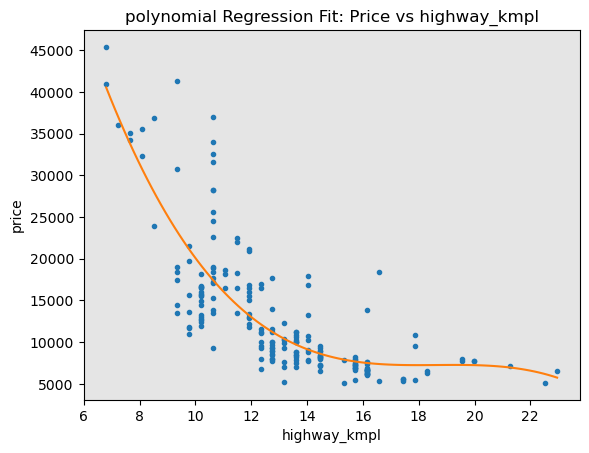

In [21]:
x = df["highway_kmpl"]
y = df["price"]

#fit the polynomial using the function polyfit
#use function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p, "\n")

plotpolly(p, x, y, "highway_kmpl")

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


           11           10         9         8        7             6
-0.000152 x  + 0.02456 x  - 1.776 x + 75.75 x - 2118 x + 4.071e+04 x
              5             4             3             2
 - 5.484e+05 x + 5.176e+06 x - 3.352e+07 x + 1.417e+08 x - 3.522e+08 x + 3.896e+08 



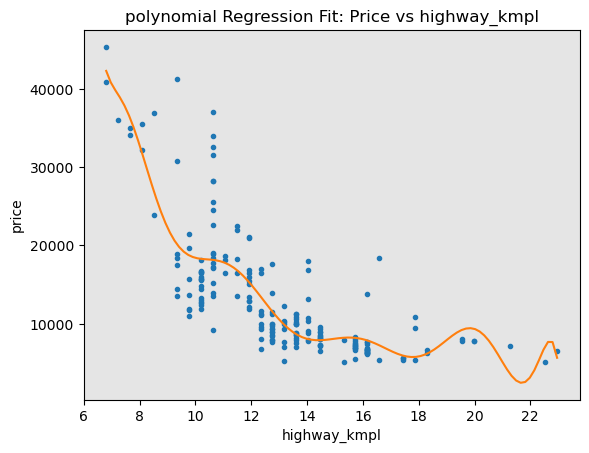

In [22]:
# Here we use a polynomial of the 11th order (based on assignment)
f = np.polyfit(x,y,11)
p = np.poly1d(f)
print(p, "\n")

plotpolly(p, x, y, "highway_kmpl")

#### Polynomial regression with Multiple variable

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>
$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


In [23]:
#from sklearn.preprocessing import PolynomialFeatures

In [24]:
# 2nd degree
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [25]:
x_multiple = df[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]]
y_multiple = df[["price"]]

x_multiple_poly = pr.fit_transform(x_multiple)
print(x_multiple.shape)
print(x_multiple_poly.shape)

(201, 4)
(201, 15)


as you can see above 4 features have been converted into 15 individual features. 
after this we apply linear regression model with multiple variables.

#### Pipeline
<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>
We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [26]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler

In [27]:
#step 1
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [28]:
# step 2
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [29]:
#step 3
x_multiple = df[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]]
y_multiple = df[["price"]]
pipe.fit(x_multiple, y_multiple)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [30]:
#step 4
y_pipe = pipe.predict(x_multiple)
y_pipe[0:5]

array([[13102.70248609],
       [13102.70248609],
       [18228.5664081 ],
       [10388.5173157 ],
       [16140.47359827]])

In [31]:
# Example with linear regression with multiple variable and pipeline
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)

x_multiple = df[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]]
y_multiple = df[["price"]]
pipe.fit(x_multiple, y_multiple)

ypipe=pipe.predict(x_multiple)
ypipe[0:5]

array([[13699.48856812],
       [13699.48856812],
       [19051.13094383],
       [10620.91218091],
       [15521.71445136]])

--------------
## Measures for In-Sample Evaluation
<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


In [32]:
# Simple Linear Regression
lm = LinearRegression()
x = df[["highway_kmpl"]]
y = df[["price"]]
lm.fit(x,y)

# R-square
print(f"The R-square is: {lm.score(x, y)}")

#MSE
#from sklearn.metrics import mean_squared_error
y_hat = lm.predict(x)
mse = mean_squared_error(y, y_hat)
print(f"The MSE is: {mse}")


The R-square is: 0.4967688042883631
The MSE is: 31623881.27036257


We can say that ~49.676% of the variation of the price is explained by this simple linear model "highway_kmpl_fit".

In [33]:
# Multiple Linear Regression
x_multiple = df[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]]
y_multiple = df[["price"]]
lm.fit(x_multiple,y_multiple)

# R-square
print(f"The R-square is: {lm.score(x_multiple, y_multiple)}")

# MSE
y_multiple_hat = lm.predict(x_multiple)
mse = mean_squared_error(y_multiple, y_multiple_hat)
print(f"The MSE is: {mse}")

The R-square is: 0.8093546428668188
The MSE is: 11980469.792219156


We can say that ~80.935% of the variation of price is explained by this multiple linear regression "multi_fit".

In [34]:
#polynomial Regression with single variable
#from sklearn.metrics import r2_score
x = df["highway_kmpl"]
y = df["price"]

# Here we use a polynomial of the 3rd order
f = np.polyfit(x,y,3)
p = np.poly1d(f)

# R-square
r_square = r2_score(y, p(x))
print(f"The R-square is: {r_square}")

# MSE
y_hat = p(x)
mse = mean_squared_error(y, y_hat)
print(f"The MSE is: {mse}")

The R-square is: 0.6740985606963382
The MSE is: 20480185.867262892


In [35]:
# Polynomial Regression with multiple variable

x_multiple = df[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]]
y_multiple = df[["price"]]

pr = PolynomialFeatures(degree = 2)
x_multiple_pr = pr.fit_transform(x_multiple)
lm.fit(x_multiple_pr,  y_multiple)

# R-square
print(f"The R-square is: {lm.score(x_multiple_pr, y_multiple)}")

# MSE
y_multiple_hat = lm.predict(x_multiple_pr)
mse = mean_squared_error(y_multiple, y_multiple_hat)
print(f"The MSE is: {mse}")

The R-square is: 0.8463531866329371
The MSE is: 9655420.06317474


<h3>Decision Making: Determining a Good Model Fit</h3>
<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>



-------------
Thank You!!!